# Exploratory Data Analysis(EDA) on eCommerce Transactions Data

## Data Overview
### 1. [Customers.csv](data/Customers.csv)
- CustomerID: Unique identifier for each customer.-  CustomerName: Name of the customer
- Region: Continent where the customer resides.
- SignupDate: Date when the customer signed up.
### 2. [Products.csv](data/Products.csv)
- ProductID: Unique identifier for each product.
- ProductName: Name of the product.
- Category: Product category.
- Price: Product price in UD.
  
### 3. [Transactions.csv](data/Transactions.csv)
- TransactionID: Unique identifier for each transaction.
- CustomerID: ID of the customer who made the transaction.
- ProductID: ID of the product sold.
- TransactionDate: Date of the transaction

In [111]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [4]:
#set the data folder's path
data_path="data/"

In [5]:
Customers_df=pd.read_csv(os.path.join(data_path,"Customers.csv"))
Products_df=pd.read_csv(os.path.join(data_path,"Products.csv"))
Transactions_df=pd.read_csv(os.path.join(data_path,"Transactions.csv"))

In [6]:
Customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
Products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
Transactions_df.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


## Data Cleaning 

In [9]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
#change SignupDate - object to Timestamp
Customers_df['SignupDate']=pd.to_datetime(Customers_df['SignupDate'])

In [11]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [12]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [13]:
#check count of unique values in Category
print(Products_df['Category'].nunique())

4


In [14]:
#change Category - object to category 
Products_df['Category']=Products_df['Category'].astype('category')

In [15]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    100 non-null    object  
 1   ProductName  100 non-null    object  
 2   Category     100 non-null    category
 3   Price        100 non-null    float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.8+ KB


In [16]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [17]:
#change TransactionDate - object to Timestamp
Transactions_df['TransactionDate']=pd.to_datetime(Transactions_df['TransactionDate'])

In [18]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [19]:
Products_df.describe().round(2)

,Price
count,100.00
mean,267.55
std,143.22
min,16.08
25%,147.77
50%,292.88
75%,397.09
max,497.76


In [20]:
Transactions_df.describe().round(2)

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.00,1000.00,1000.00
mean,2024-06-23 15:33:02.768999936,2.54,690.00,272.55
min,2023-12-30 15:29:12,1.00,16.08,16.08
25%,2024-03-25 22:05:34.500000,2.00,295.29,147.95
50%,2024-06-26 17:21:52.500000,3.00,588.88,299.93
75%,2024-09-19 14:19:57,4.00,1011.66,404.40
max,2024-12-28 11:00:00,4.00,1991.04,497.76
std,NaN,1.12,493.14,140.74


## Merging Dataframes



In [27]:
new_df=Transactions_df.merge(Customers_df,on='CustomerID',how='left').merge(Products_df,on='ProductID',how='left')

In [28]:
new_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00015,C0001,P054,2024-01-19 03:12:55,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,SoundWave Cookbook,Books,57.30
1,T00932,C0001,P022,2024-09-17 09:01:18,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,HomeSense Wall Art,Home Decor,137.54
2,T00085,C0001,P096,2024-04-08 00:01:00,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,SoundWave Headphones,Electronics,307.47
3,T00445,C0001,P083,2024-05-07 03:11:44,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,ActiveWear Smartwatch,Electronics,455.72
4,T00436,C0001,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,TechPro Headphones,Electronics,433.64


In [31]:
#verify price_x and price_y are same
(new_df['Price_x']==new_df['Price_y']).all()

False

In [34]:
new_df[new_df['Price_x'] != new_df['Price_y']]


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
904,NaN,C0180,NaN,NaT,NaN,NaN,NaN,Amy Carpenter,Asia,2023-10-25,NaN,NaN,NaN


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1001 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   float64       
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1001 non-null   object        
 8   Region           1001 non-null   object        
 9   SignupDate       1001 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   category      
 12  Price_y          1000 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(4), object(6)
memory usage: 95.1+ KB


In [36]:
new_df.isnull().sum()

TransactionID      1
CustomerID         0
ProductID          1
TransactionDate    1
Quantity           1
TotalValue         1
Price_x            1
CustomerName       0
Region             0
SignupDate         0
ProductName        1
Category           1
Price_y            1
dtype: int64

In [39]:
#checkout the rows with missing values
new_df[new_df.isnull().any(axis=1)].head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
904,NaN,C0180,NaN,NaT,NaN,NaN,NaN,Amy Carpenter,Asia,2023-10-25,NaN,NaN,NaN


In [41]:
#removing the row with null values
final_df=new_df.dropna()

In [43]:
final_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   float64       
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(3), object(6)
memory usage: 94.9+ KB


In [45]:
(final_df['Price_x']==final_df['Price_y']).all()

True

In [48]:
#Removing Price_y 
final_df=final_df.drop(columns=['Price_y'])

In [69]:
#rename column 
final_df=final_df.rename(columns={'Price_x':'Price'})
final_df.head()

,TransactionID,CustomerID,hour,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00015,C0001,3,P054,2024-01-19 03:12:55,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,SoundWave Cookbook,Books
1,T00932,C0001,9,P022,2024-09-17 09:01:18,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,HomeSense Wall Art,Home Decor
2,T00085,C0001,0,P096,2024-04-08 00:01:00,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,SoundWave Headphones,Electronics
3,T00445,C0001,3,P083,2024-05-07 03:11:44,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,ActiveWear Smartwatch,Electronics
4,T00436,C0001,17,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,TechPro Headphones,Electronics


## How many days of Transaction data do we have?

In [74]:
start_date=final_df.TransactionDate.min()
print(start_date)
end_date=final_df.TransactionDate.max()
print(end_date)
(end_date-start_date)

2023-12-30 15:29:12
2024-12-28 11:00:00


Timedelta('363 days 19:30:48')

## Add coloumns for Month, Day & Hour from Transaction data

In [80]:
final_df.insert(loc=4, column='Transaction_year_month', value=final_df['TransactionDate'].map(lambda x: 100*x.year + x.month))
final_df.insert(loc=5, column='Transaction_Month', value=final_df.TransactionDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
final_df.insert(loc=6, column='Transaction_Day', value=(final_df.TransactionDate.dt.dayofweek)+1)
final_df.insert(loc=7, column='Transaction_Hour', value=final_df.TransactionDate.dt.hour)

In [81]:
final_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Transaction_year_month,Transaction_Month,Transaction_Day,Transaction_Hour,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00015,C0001,P054,2024-01-19 03:12:55,202401,1,5,3,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,SoundWave Cookbook,Books
1,T00932,C0001,P022,2024-09-17 09:01:18,202409,9,2,9,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,HomeSense Wall Art,Home Decor
2,T00085,C0001,P096,2024-04-08 00:01:00,202404,4,1,0,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,SoundWave Headphones,Electronics
3,T00445,C0001,P083,2024-05-07 03:11:44,202405,5,2,3,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,ActiveWear Smartwatch,Electronics
4,T00436,C0001,P029,2024-11-02 17:04:16,202411,11,6,17,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,TechPro Headphones,Electronics


## Add column Signup_year for SignupDate

In [83]:
final_df.insert(loc=14,column='Signup_year',value=final_df.SignupDate.dt.year)

In [84]:
final_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Transaction_year_month,Transaction_Month,Transaction_Day,Transaction_Hour,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,Signup_year,ProductName,Category
0,T00015,C0001,P054,2024-01-19 03:12:55,202401,1,5,3,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Cookbook,Books
1,T00932,C0001,P022,2024-09-17 09:01:18,202409,9,2,9,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,2022,HomeSense Wall Art,Home Decor
2,T00085,C0001,P096,2024-04-08 00:01:00,202404,4,1,0,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Headphones,Electronics
3,T00445,C0001,P083,2024-05-07 03:11:44,202405,5,2,3,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,2022,ActiveWear Smartwatch,Electronics
4,T00436,C0001,P029,2024-11-02 17:04:16,202411,11,6,17,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,2022,TechPro Headphones,Electronics


# Exploratory Data Analysis (EDA)

## How many orders made by the customer?

In [85]:
final_df.groupby(by=['CustomerID','CustomerName','Region'], as_index=False)['Quantity'].count().head()

,CustomerID,CustomerName,Region,Quantity
0,C0001,Lawrence Carroll,South America,5
1,C0002,Elizabeth Lutz,Asia,4
2,C0003,Michael Rivera,South America,4
3,C0004,Kathleen Rodriguez,South America,8
4,C0005,Laura Weber,Asia,3


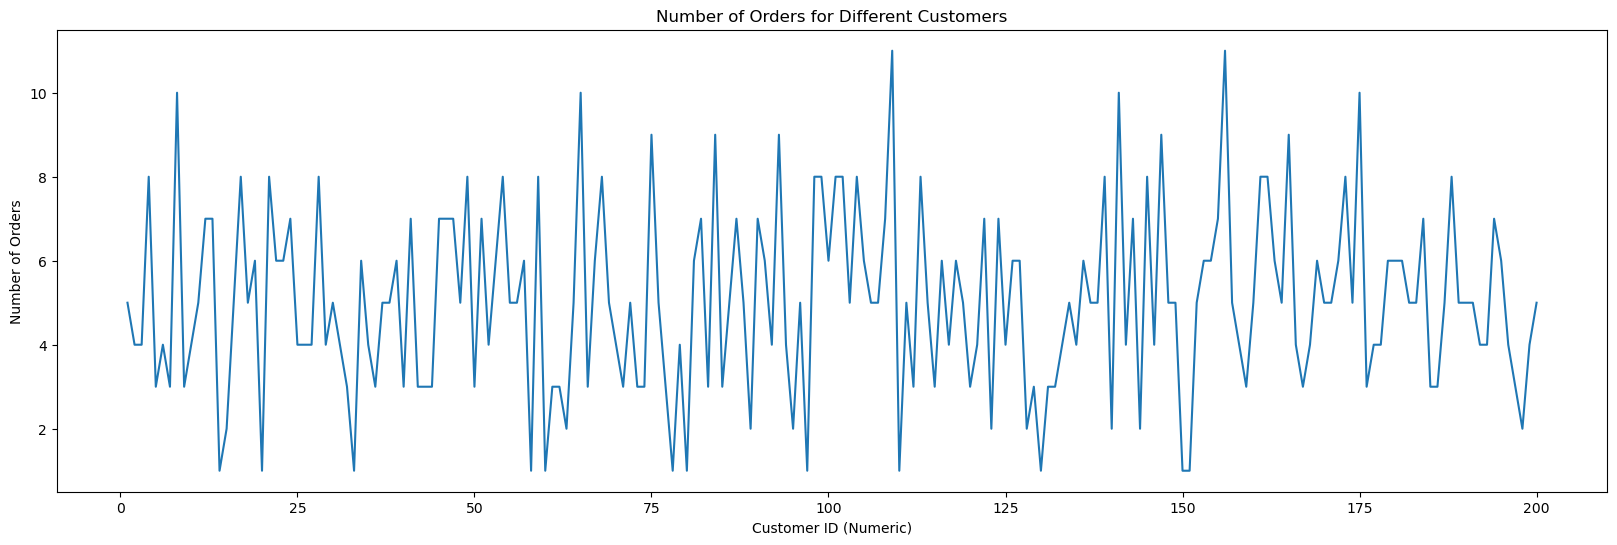

In [101]:
orders['CustomerID_numeric'] = orders['CustomerID'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(20, 6))
plt.plot(orders.CustomerID_numeric, orders.Quantity)
plt.xlabel('Customer ID (Numeric)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()



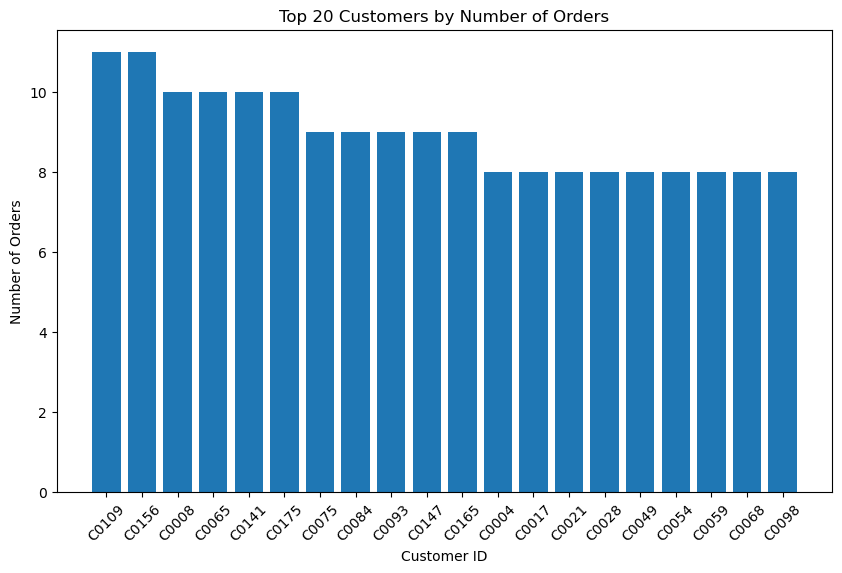

In [102]:
top_customers = orders.nlargest(25, 'Quantity') 
plt.figure(figsize=(10, 6))
plt.bar(top_customers.CustomerID, top_customers.Quantity)
plt.xticks(rotation=45)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 25 Customers by Number of Orders')
plt.show()

## Check TOP 5 most number of orders

In [103]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Quantity', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,CustomerName,Region,Quantity,CustomerID_numeric
155,C0156,William Adams,North America,11,156
108,C0109,Abigail Jones,North America,11,109
174,C0175,Matthew Johnson,Asia,10,175
140,C0141,Paul Parsons,Europe,10,141
64,C0065,Gerald Hines,North America,10,65


## How much money spent by the customers?

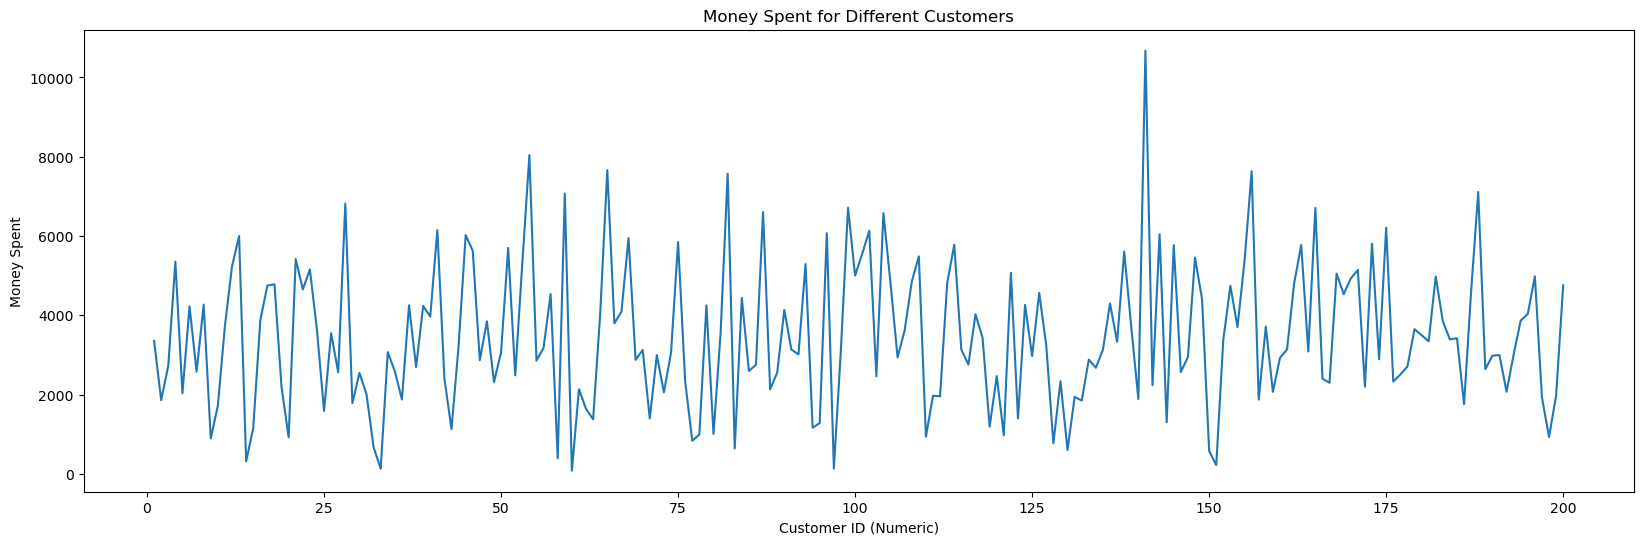

In [108]:
money_spent = final_df.groupby(by=['CustomerID', 'CustomerName', 'Region'], as_index=False)['TotalValue'].sum()
money_spent['CustomerID_numeric'] = money_spent['CustomerID'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(20, 6))
plt.plot(money_spent.CustomerID_numeric, money_spent.TotalValue)
plt.xlabel('Customer ID (Numeric)')
plt.ylabel('Money Spent')
plt.title('Money Spent for Different Customers')
plt.show()


## Check TOP 5 highest money spent

In [109]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='TotalValue', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,CustomerName,Region,TotalValue,CustomerID_numeric
140,C0141,Paul Parsons,Europe,10673.87,141
53,C0054,Bruce Rhodes,Asia,8040.39,54
64,C0065,Gerald Hines,North America,7663.70,65
155,C0156,William Adams,North America,7634.45,156
81,C0082,Aimee Taylor,South America,7572.91,82


## Discover patterns for Number of Orders

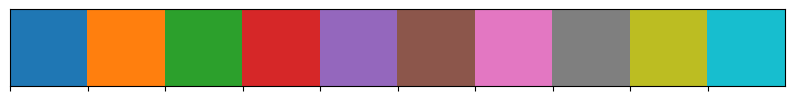

In [112]:
# color available
sns.palplot(color)

In [113]:
final_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Transaction_year_month,Transaction_Month,Transaction_Day,Transaction_Hour,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,Signup_year,ProductName,Category,CustomerID_numeric
0,T00015,C0001,P054,2024-01-19 03:12:55,202401,1,5,3,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Cookbook,Books,0001
1,T00932,C0001,P022,2024-09-17 09:01:18,202409,9,2,9,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,2022,HomeSense Wall Art,Home Decor,0001
2,T00085,C0001,P096,2024-04-08 00:01:00,202404,4,1,0,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Headphones,Electronics,0001
3,T00445,C0001,P083,2024-05-07 03:11:44,202405,5,2,3,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,2022,ActiveWear Smartwatch,Electronics,0001
4,T00436,C0001,P029,2024-11-02 17:04:16,202411,11,6,17,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,2022,TechPro Headphones,Electronics,0001


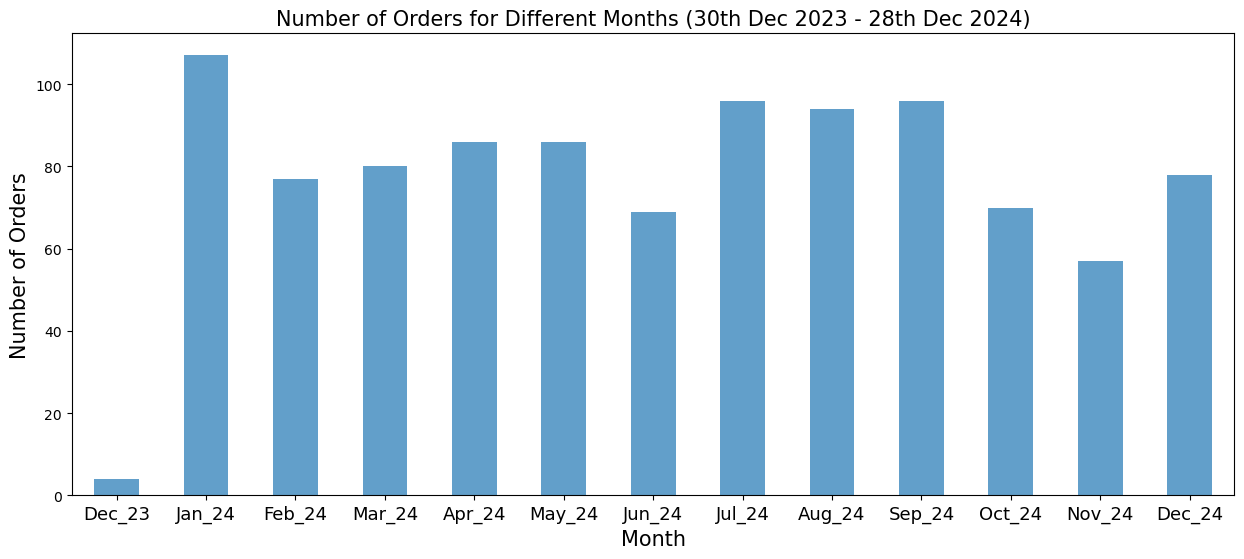

In [135]:
# Group data by Transaction_year_month and count occurrences
monthly_orders = (final_df.groupby('Transaction_year_month').size().sort_index())
fig, ax = plt.subplots(figsize=(15, 6))
monthly_orders.plot(kind='bar', ax=ax,color=color[0], alpha=0.7)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Months (30th Dec 2023 - 28th Dec 2024)', fontsize=15)
ax.set_xticks(range(len(monthly_orders.index)))
ax.set_xticklabels(['Dec_23', 'Jan_24', 'Feb_24', 'Mar_24', 'Apr_24', 'May_24', 'Jun_24','Jul_24', 'Aug_24', 'Sep_24', 'Oct_24', 'Nov_24', 'Dec_24'],rotation='horizontal',fontsize=13)
plt.show()

## How many orders (per day)?

In [132]:
day_orders = final_df.groupby('Quantity')['Transaction_Day'].apply(list).explode().value_counts().sort_index()
print(day_orders)

Transaction_Day
1    139
2    163
3    158
4    150
5    125
6    126
7    139
Name: count, dtype: int64


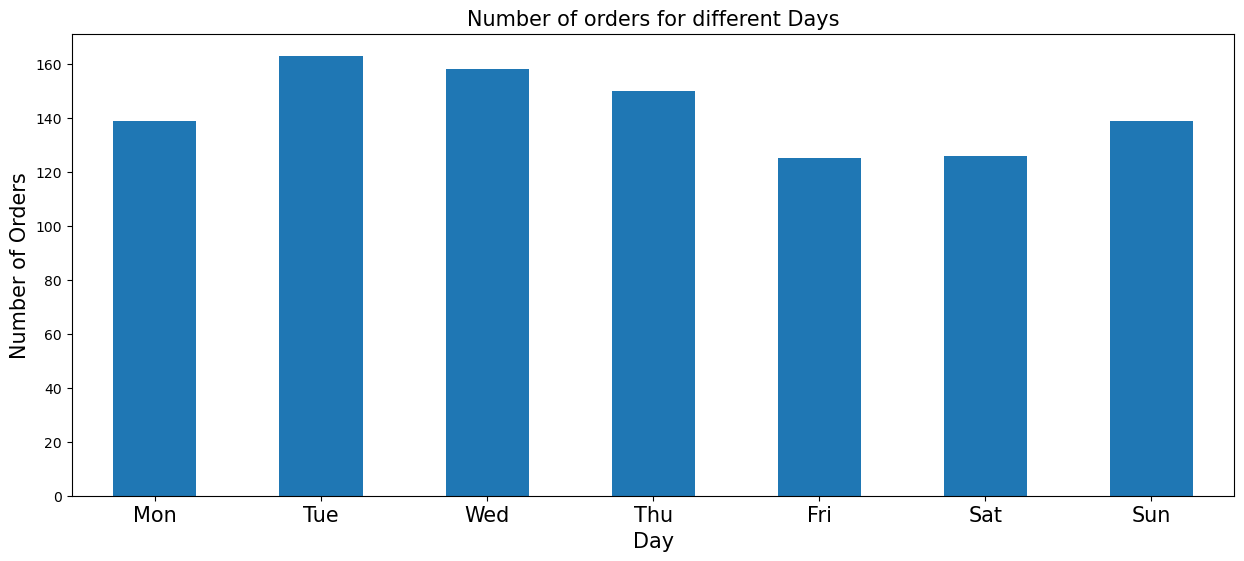

In [134]:
ax=day_orders.plot(kind='bar', color=color[0], figsize=(15, 6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticks(range(len(day_labels)))
ax.set_xticklabels(day_labels, rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [138]:
hour_orders = final_df.groupby('Quantity')['Transaction_Hour'].unique().apply(len).iloc[:-1].sort_index()

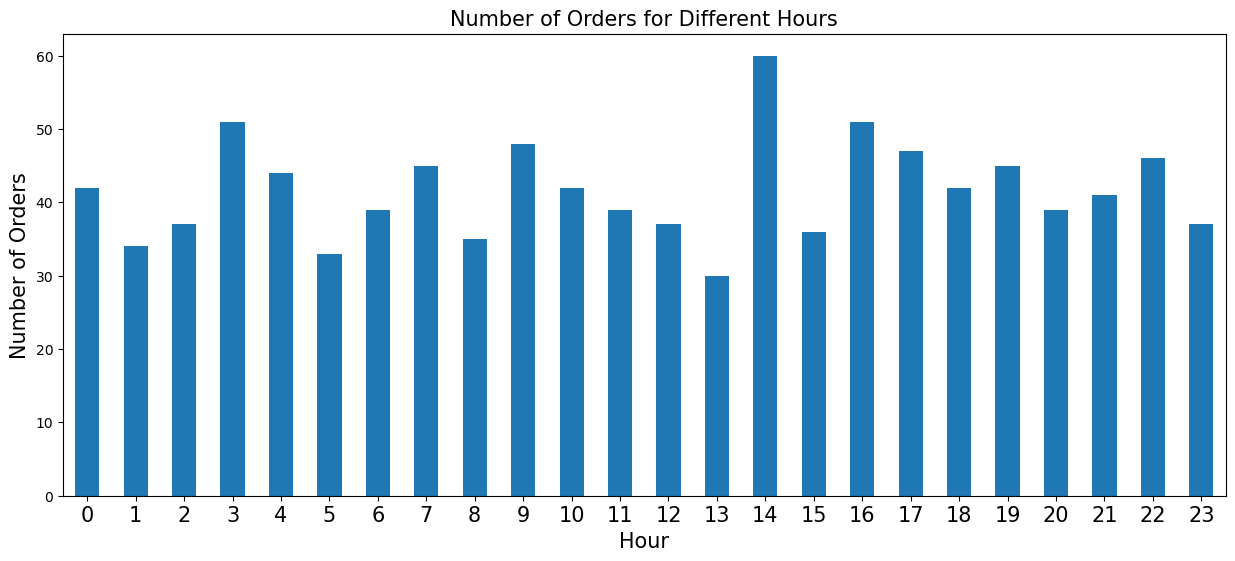

In [145]:
hour_orders = final_df.groupby('Transaction_Hour')['Quantity'].count().sort_index()
ax = hour_orders.plot(kind='bar', color=color[0], figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Hours', fontsize=15)
ax.set_xticks(range(len(hour_orders.index)))
ax.set_xticklabels(hour_orders.index, rotation='horizontal', fontsize=15)
plt.show()


In [147]:
print(final_df['Transaction_Hour'].unique())


[ 3  9  0 17 10 23  7  1 19  5  2 18  6 22 16 14 13  4  8 20 11 15 12 21]


In [149]:
print(final_df['Transaction_Hour'].isnull().sum()) 
print(final_df[final_df['Transaction_Hour'] == 0])  

0
    TransactionID CustomerID ProductID     TransactionDate  \
2          T00085      C0001      P096 2024-04-08 00:01:00   
23         T00789      C0005      P012 2024-11-04 00:30:22   
62         T00503      C0013      P017 2024-07-26 00:21:59   
91         T00507      C0019      P018 2024-05-28 00:57:27   
94         T00350      C0020      P096 2024-01-30 00:57:29   
96         T00069      C0021      P086 2024-01-13 00:48:20   
120        T00689      C0024      P090 2024-05-30 00:00:01   
128        T00787      C0026      P027 2024-06-04 00:03:44   
154        T00238      C0031      P091 2024-08-11 00:11:15   
163        T00905      C0034      P033 2024-09-22 00:00:09   
175        T00267      C0037      P066 2024-06-30 00:11:05   
249        T00257      C0051      P091 2024-08-10 00:39:50   
287        T00071      C0059      P068 2024-10-24 00:10:41   
321        T00008      C0067      P069 2024-10-17 00:45:17   
323        T00431      C0067      P078 2024-08-15 00:55:59   
336   

## Discover patterns for Unit Price

In [152]:
final_df.Price.describe()

count    1000.00000
mean      272.55407
std       140.73639
min        16.08000
25%       147.95000
50%       299.93000
75%       404.40000
max       497.76000
Name: Price, dtype: float64

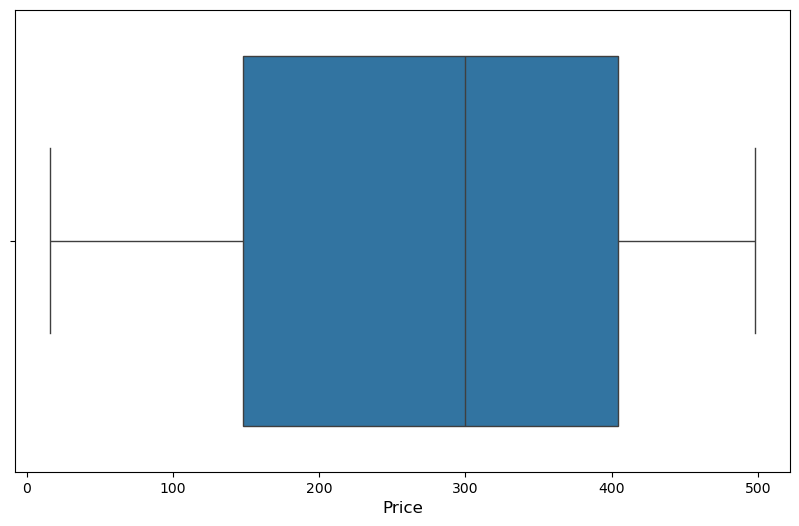

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['Price'])
plt.xlabel('Price', fontsize=12)
plt.show()


## Count of Customers who brought lowest price item in the list

In [167]:
lowest_price = final_df['Price'].min()
lowest_items_row =final_df[final_df['Price'] == lowest_price]
lowest_items_customers_count = lowest_price_items['CustomerID'].nunique()
print(f"Number of users who bought the lowest-priced items: {lowest_items_customers_count}")

Number of users who bought the lowest-priced items: 8


## Count of Customers who brought highest price item in the list

In [169]:
highest_price = final_df['Price'].max()
highest_price_items_row = final_df[final_df['Price'] == highest_price]
highest_items_customers_count = highest_price_items_row['CustomerID'].nunique()
print(f"Number of users who bought the highest-priced items: {highest_items_customers_count}")

Number of users who bought the highest-priced items: 10


## Top 10 most purchased items

In [177]:
top_most_purchased_items = final_df.groupby('ProductID')['TransactionID'].count().reset_index() \
    .merge(final_df[['ProductID', 'ProductName','Category']].drop_duplicates(), on='ProductID', how='left') \
    .sort_values('TransactionID', ascending=False).head(10)
print(top_most_purchased_items)


   ProductID  TransactionID            ProductName     Category
58      P059             19        SoundWave Jeans     Clothing
28      P029             17     TechPro Headphones  Electronics
61      P062             16        HomeSense Novel        Books
78      P079             16         ActiveWear Rug   Home Decor
53      P054             16     SoundWave Cookbook        Books
60      P061             16    HomeSense Desk Lamp   Home Decor
56      P057             15  ActiveWear Smartphone  Electronics
47      P048             15       TechPro Cookbook        Books
21      P022             15     HomeSense Wall Art   Home Decor
48      P049             15       TechPro Textbook        Books


In [180]:
end_top_most_purchased_items = final_df.groupby('ProductID')['TransactionID'].count().reset_index() \
    .merge(final_df[['ProductID', 'ProductName','Category']].drop_duplicates(), on='ProductID', how='left') \
    .sort_values('TransactionID', ascending=False).tail(20)
print(end_top_most_purchased_items)


   ProductID  TransactionID                  ProductName     Category
94      P095              7       BookWorld Cookware Set   Home Decor
90      P091              7                HomeSense Rug   Home Decor
36      P037              7         SoundWave Smartwatch  Electronics
3       P004              7                BookWorld Rug   Home Decor
25      P026              7  SoundWave Bluetooth Speaker  Electronics
8       P009              7           BookWorld Wall Art   Home Decor
17      P018              7   ComfortLiving Mystery Book        Books
97      P098              7             SoundWave Laptop  Electronics
88      P089              7  HomeSense Bluetooth Speaker  Electronics
69      P070              6            HomeSense T-Shirt     Clothing
99      P100              6            HomeSense Sweater     Clothing
71      P072              6        ActiveWear Headphones  Electronics
76      P077              6        ActiveWear Smartwatch  Electronics
59      P060        

In [179]:
print(final_df['Category'].unique())

['Books', 'Home Decor', 'Electronics', 'Clothing']
Categories (4, object): ['Books', 'Clothing', 'Electronics', 'Home Decor']


## Discover patterns for each Region

In [181]:
final_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Transaction_year_month,Transaction_Month,Transaction_Day,Transaction_Hour,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,Signup_year,ProductName,Category,CustomerID_numeric
0,T00015,C0001,P054,2024-01-19 03:12:55,202401,1,5,3,2.0,114.60,57.30,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Cookbook,Books,0001
1,T00932,C0001,P022,2024-09-17 09:01:18,202409,9,2,9,3.0,412.62,137.54,Lawrence Carroll,South America,2022-07-10,2022,HomeSense Wall Art,Home Decor,0001
2,T00085,C0001,P096,2024-04-08 00:01:00,202404,4,1,0,2.0,614.94,307.47,Lawrence Carroll,South America,2022-07-10,2022,SoundWave Headphones,Electronics,0001
3,T00445,C0001,P083,2024-05-07 03:11:44,202405,5,2,3,2.0,911.44,455.72,Lawrence Carroll,South America,2022-07-10,2022,ActiveWear Smartwatch,Electronics,0001
4,T00436,C0001,P029,2024-11-02 17:04:16,202411,11,6,17,3.0,1300.92,433.64,Lawrence Carroll,South America,2022-07-10,2022,TechPro Headphones,Electronics,0001


## How many orders for each Region?

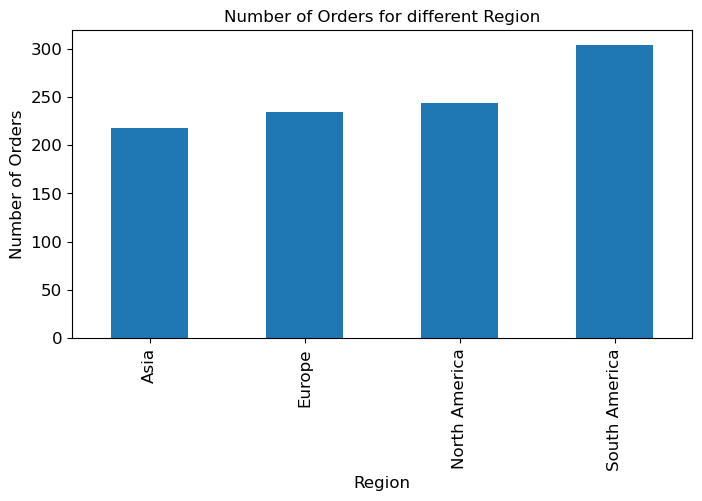

In [193]:
group_country_orders = final_df.groupby('Region')['Quantity'].count().sort_values()
# plot number of unique customers in each Region
plt.subplots(figsize=(8,4))
group_country_orders.plot(kind='bar', fontsize=12, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title('Number of Orders for different Region', fontsize=12)
plt.show()

## How much money spent by each Region?

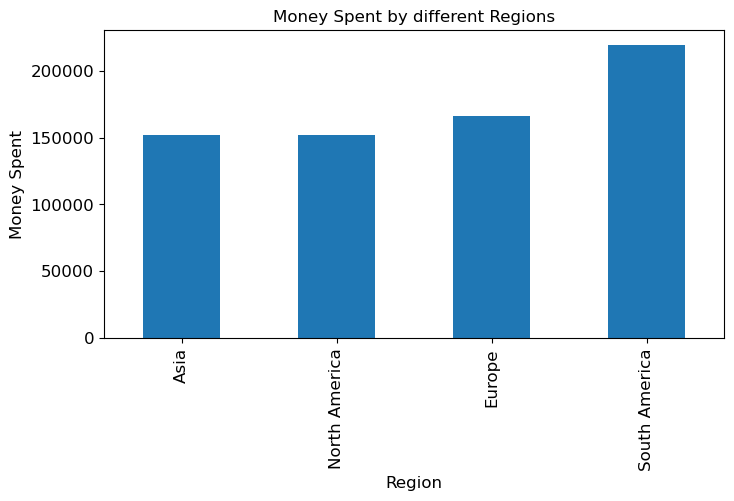

In [196]:
group_country_amount_spent = final_df.groupby('Region')['TotalValue'].sum().sort_values()
# plot number of unique customers in each Region
plt.subplots(figsize=(8,4))
group_country_amount_spent.plot(kind='bar', fontsize=12, color=color[0])
plt.ylabel('Money Spent', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title('Money Spent by different Regions', fontsize=12)
plt.show()

## Count of customers registered per year

In [198]:
customer_registration_count = final_df.groupby('Signup_year')['CustomerID'].nunique()
print(customer_registration_count)

Signup_year
2022    64
2023    56
2024    79
Name: CustomerID, dtype: int64


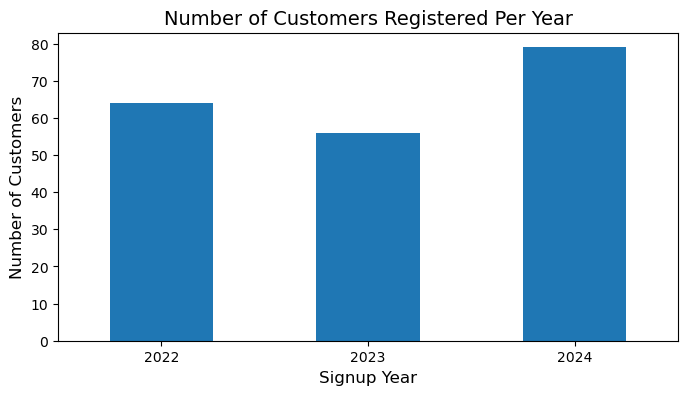

In [200]:
plt.figure(figsize=(8,4))
customer_registration_count.plot(kind='bar', color=color[0])
plt.xlabel('Signup Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Number of Customers Registered Per Year', fontsize=14)
plt.xticks(rotation=0)
plt.show()